In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#load csv file
df=pd.read_csv('cartrade.csv')

In [3]:
df.head()

,Brand,Model,km_driven,Owner,Mfg_year,Fuel_type,Mileage,Transmission,Price(lakh)
0,Hyundai,Creta,"28,662",First,2020,Petrol,15.29,Automatic,14.90
1,Skoda,Superb,"34,463",Second,2017,Petrol,14.81,Automatic,15.95
2,BMW,X1,"64,300",Second,2016,Diesel,FWD,BS,18.75
3,Mercedes-Benz,C-Class,"57,750",First,2015,Petrol,14.74,Automatic,23.85
4,Hyundai,Creta,"71,000",First,2019,Diesel,17.01,Automatic,15.49


# Preprocessing

In [4]:
# checking for null values
df.isnull().sum()

Brand           0
Model           0
km_driven       0
Owner           0
Mfg_year        0
Fuel_type       0
Mileage         0
Transmission    0
Price(lakh)     0
dtype: int64

In [5]:
#drop duplicate values
df.drop_duplicates()

,Brand,Model,km_driven,Owner,Mfg_year,Fuel_type,Mileage,Transmission,Price(lakh)
0,Hyundai,Creta,"28,662",First,2020,Petrol,15.29,Automatic,14.90
1,Skoda,Superb,"34,463",Second,2017,Petrol,14.81,Automatic,15.95
2,BMW,X1,"64,300",Second,2016,Diesel,FWD,BS,18.75
3,Mercedes-Benz,C-Class,"57,750",First,2015,Petrol,14.74,Automatic,23.85
4,Hyundai,Creta,"71,000",First,2019,Diesel,17.01,Automatic,15.49
...,...,...,...,...,...,...,...,...,...
1005,Hyundai,Elite,"60,902",Second,2017,Petrol,FWD,No,6.90
1006,Maruti,Suzuki,"45,169",First,2019,Petrol,22.74,Manual,3.69
1007,Maruti,Suzuki,"43,149",First,2013,Petrol,15,3539,2.83
1008,Maruti,Suzuki,"18,099",Second,2018,Petrol,23.1,AMT,4.83


In [6]:
#checking data types of all column
df.dtypes

Brand            object
Model            object
km_driven        object
Owner            object
Mfg_year          int64
Fuel_type        object
Mileage          object
Transmission     object
Price(lakh)     float64
dtype: object

In [7]:
# columns like km_driven,mileage should be integer type but they are object type in this dataset
#we need to check why this columns are object type

In [8]:
df['km_driven']=[float(str(i).replace(",", "")) for i in df["km_driven"]]

In [9]:
df['km_driven'].dtype

dtype('float64')

In [10]:
df['km_driven']

0       28662.0
1       34463.0
2       64300.0
3       57750.0
4       71000.0
         ...   
1005    60902.0
1006    45169.0
1007    43149.0
1008    18099.0
1009    33166.0
Name: km_driven, Length: 1010, dtype: float64

In [11]:
df['Mileage'].unique()

array(['15.29', '14.81', 'FWD', '14.74', '17.01', '18.7', '23.1', '22.15',
       '18.12', '17.4', '350', 'Manual', '16.8', '19.4', '17', '21.4',
       '20.4', '19.16', '20', '15.1', '14.29', '20.5', '24.29', '22.69',
       '11.4', '15.23', '15.96', '15.5', '19.1', '16.7', '18.6', '19.01',
       '22', '58', '15.04', '18.15', '17.5', '18.5', '17.97', '16',
       '22.5', '20.729999542236328', '19.12', '28.09', '24.2', '17.88',
       '19.77', '19.8', '18.9', '17.19', '16.2', '16.47', '20.73',
       '16.95', '23', '18.19', '12.9', '19', '19.3', '13.1', '16.96',
       '10.91', '2791', '14.7', '16.3', '17.2', '15.56', 'Automatic',
       '12.06', '13.9', '13.85', '4WD', '15.77', '14.6', 'AWD', '20.45',
       '15.97', '17.57', '22.74', 'RWD', '14.69', '335', '16.65', '241',
       '8.2', '18.48', '14.2', '11.33', '23.65', '20.63', '10.37',
       '14.59', '22.54', '194', '188', '16.5', '21.38', '17.99', '18.88',
       '14.75', '20.52', '15.6', '17.1', '17.41', '13.7', '16.55',
      

In [12]:
#column contains string 
#need to remove those strings
#Replace string with null values

In [13]:
df['Mileage'].replace('FWD',np.nan,inplace=True)
df['Mileage'].replace('Manual',np.nan,inplace=True)
df['Mileage'].replace('Automatic',np.nan,inplace=True)
df['Mileage'].replace('4WD',np.nan,inplace=True)

In [14]:
df['Mileage'].replace('RWD',np.nan,inplace=True)
df['Mileage'].replace('AWD',np.nan,inplace=True)
df['Mileage']=df['Mileage'].astype('float')

In [15]:
#fill nul value with mean of that column
m=df['Mileage'].mean()
df['Mileage'].fillna(m,inplace=True)

In [16]:
#cross chack
df.isnull().sum()

Brand           0
Model           0
km_driven       0
Owner           0
Mfg_year        0
Fuel_type       0
Mileage         0
Transmission    0
Price(lakh)     0
dtype: int64

In [17]:
df.dtypes

Brand            object
Model            object
km_driven       float64
Owner            object
Mfg_year          int64
Fuel_type        object
Mileage         float64
Transmission     object
Price(lakh)     float64
dtype: object

In [18]:
df['Transmission'].unique()

array(['Automatic', 'BS', 'Manual', '704', '1475', 'No', 'FWD',
       'Turbocharged', '4555', 'AMT', '1826', '3821', '807', 'Idle',
       '9.8', '1799', '14', 'AWD', '4879', '12.8', '15.3', '4886', '905',
       '4370', '10.6', '4WD', '4797', '5295', '20.3', 'Yes', 'RWD', '585',
       '22', '18.64', '17.6', '4431', '4838', '13.3', '1152', '3539',
       '791', '3775', '861', '1920', '4386'], dtype=object)

In [19]:
#Transmission column contain items that are not type of transmission
#need to remove those values

In [20]:
x=df[df['Transmission'] != 'Automatic']
y=x[x['Transmission']!='Manual'].index

In [21]:
#drop unwanted values from column
df['Transmission']=df['Transmission'].drop(y)

In [22]:
df['Transmission'].unique()

array(['Automatic', nan, 'Manual'], dtype=object)

In [23]:
df['Transmission'].mode()

0    Automatic
dtype: object

In [24]:
#fill null values with mode of that column
df['Transmission'].fillna('Automatic',inplace=True)

In [25]:
#cross check
df['Transmission'].isnull().sum()

0

In [26]:
#converting 'Mfg_year' into object type
df['Mfg_year']=df['Mfg_year'].astype('object')

In [27]:
df.dtypes

Brand            object
Model            object
km_driven       float64
Owner            object
Mfg_year         object
Fuel_type        object
Mileage         float64
Transmission     object
Price(lakh)     float64
dtype: object

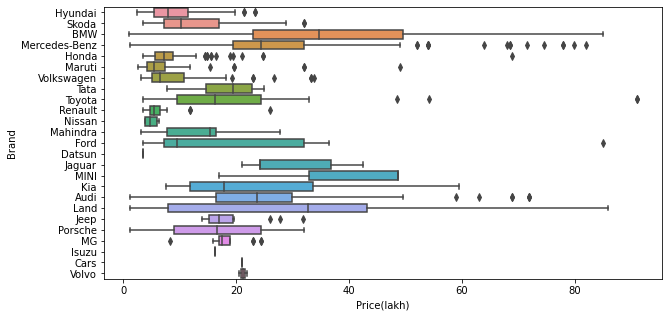

In [28]:
# to check outkier in price column with input 'Btand'col
plt.figure(figsize=(10,5))
sb.boxplot(data=df,x='Price(lakh)',y='Brand')
plt.show()

In [29]:
#here we see many outlier in each brand
#we need to remove outlier one by one

In [30]:
# to shoe thpose records whose make= isuzu and price>200000
l=df[(df['Brand']=='Hyundai')&(df['Price(lakh)']>20)].index
df.drop(l,inplace=True)

In [31]:
l=df[(df['Brand']=='Skoda')&(df['Price(lakh)']>25)].index
df.drop(l,inplace=True)

In [32]:
l=df[(df['Brand']=='Mercedes-Benz')&(df['Price(lakh)']>40)].index
df.drop(l,inplace=True)

In [33]:
l=df[(df['Brand']=='Mercedes-Benz')&(df['Price(lakh)']<13)].index
df.drop(l,inplace=True)

In [34]:
l=df[(df['Brand']=='Honda')&(df['Price(lakh)']>13)].index
df.drop(l,inplace=True)

In [35]:
l=df[(df['Brand']=='Maruti')&(df['Price(lakh)']>10)].index
df.drop(l,inplace=True)

In [36]:
l=df[(df['Brand']=='Volkswagen')&(df['Price(lakh)']>9)].index
df.drop(l,inplace=True)

In [37]:
l=df[(df['Brand']=='Toyota')&(df['Price(lakh)']>35)].index
df.drop(l,inplace=True)

In [38]:
l=df[(df['Brand']=='Renault')&(df['Price(lakh)']>10)].index
df.drop(l,inplace=True)

In [39]:
l=df[(df['Brand']=='Ford')&(df['Price(lakh)']>38)].index
df.drop(l,inplace=True)

In [40]:
l=df[(df['Brand']=='Audi')&(df['Price(lakh)']>45)].index
df.drop(l,inplace=True)

In [41]:
l=df[(df['Brand']=='Jeep')&(df['Price(lakh)']>20)].index
df.drop(l,inplace=True)

In [42]:
l=df[(df['Brand']=='MG')&(df['Price(lakh)']<15)].index
df.drop(l,inplace=True)

In [43]:
l=df[(df['Brand']=='MG')&(df['Price(lakh)']>15)].index
df.drop(l,inplace=True)

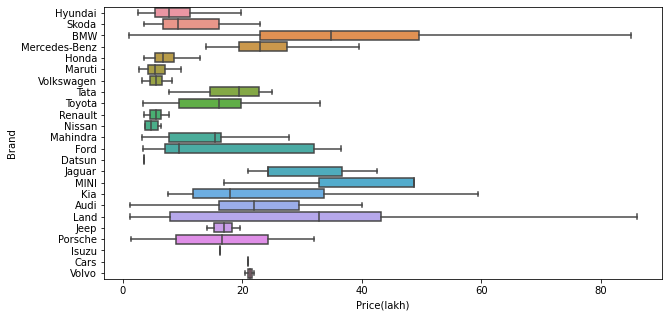

In [45]:
# to check outkier in price column with input 'make'col
plt.figure(figsize=(10,5))
sb.boxplot(data=df,x='Price(lakh)',y='Brand')
plt.show()

<AxesSubplot:xlabel='Mileage'>

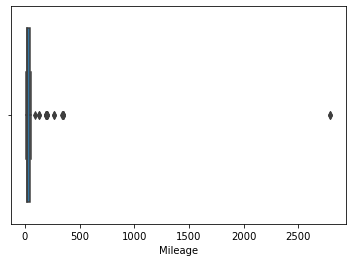

In [46]:
sb.boxplot(data=df,x='Mileage')

In [47]:
l=df[df['Mileage']>60].index
df.drop(l,inplace=True)

<AxesSubplot:xlabel='Mileage'>

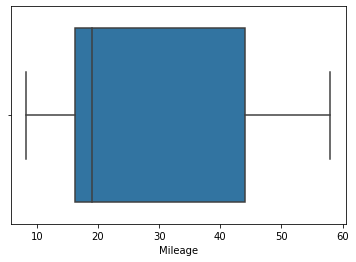

In [48]:
sb.boxplot(data=df,x='Mileage')

In [49]:
df.dtypes

Brand            object
Model            object
km_driven       float64
Owner            object
Mfg_year         object
Fuel_type        object
Mileage         float64
Transmission     object
Price(lakh)     float64
dtype: object

In [50]:
# converting object time colmn into numerical column
df_cat=df.select_dtypes('object')

In [51]:
df_num=df.select_dtypes('float64')

In [52]:
# appy Label Enoder on object type data
from sklearn.preprocessing import LabelEncoder

In [53]:
columns=df_cat.columns
for col in columns:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

<ipython-input-53-74f2b41df87e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col]=le.fit_transform(df_cat[col])


In [54]:
df_cat

,Brand,Model,Owner,Mfg_year,Fuel_type,Transmission
0,6,24,0,8,3,0
1,19,63,1,5,3,0
2,1,75,1,4,1,0
3,15,14,0,3,3,0
4,6,24,0,7,1,0
...,...,...,...,...,...,...
1005,6,30,1,5,3,0
1006,14,64,0,7,3,1
1007,14,64,0,1,3,0
1008,14,64,1,6,3,0


In [55]:
#concatenate both catogorical and numerical dataframe
df_new=pd.concat([df_cat,df_num],axis=1)

In [56]:
df_new

,Brand,Model,Owner,Mfg_year,Fuel_type,Transmission,km_driven,Mileage,Price(lakh)
0,6,24,0,8,3,0,28662.0,15.290000,14.90
1,19,63,1,5,3,0,34463.0,14.810000,15.95
2,1,75,1,4,1,0,64300.0,43.981525,18.75
3,15,14,0,3,3,0,57750.0,14.740000,23.85
4,6,24,0,7,1,0,71000.0,17.010000,15.49
...,...,...,...,...,...,...,...,...,...
1005,6,30,1,5,3,0,60902.0,43.981525,6.90
1006,14,64,0,7,3,1,45169.0,22.740000,3.69
1007,14,64,0,1,3,0,43149.0,15.000000,2.83
1008,14,64,1,6,3,0,18099.0,23.100000,4.83


# Training data

In [57]:
#Defining input and outut variables
x=df_new.drop('Price(lakh)',axis=1)
y=df_new['Price(lakh)']

In [58]:
#split data into 2 parts ie. training(70%) & testing(30% )
from  sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.3,random_state=1)

In [60]:
# apply std scaller  omn x_train and x_test
from sklearn.preprocessing import StandardScaler

In [61]:
#create object
ss=StandardScaler()

In [62]:
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [63]:
# perform model with linear ligression
from sklearn.linear_model import LinearRegression

In [64]:
#create object
lr=LinearRegression()

In [65]:
#train 70%data
lr.fit(x_train,y_train)

LinearRegression()

In [66]:
#check splop(m)
m=lr.coef_
m

array([-1.2800649 , -2.18288272,  0.58565794,  3.18720175, -3.90257558,
       -3.68727403, -0.29000908, -0.7437734 ])

In [67]:
#check coeiffient(c)
c=lr.intercept_
c

14.477027914614123

In [68]:
#check prediction usng x_test
y_pred=lr.predict(x_test)
#y_pred

In [69]:
#compare actual values vs predicted values
dict={'actual o/p':y_test,'predicted o/p':y_pred}
df1=pd.DataFrame(dict)
df1

,actual o/p,predicted o/p
328,24.25,11.865469
569,5.95,2.766007
191,3.65,12.069261
197,16.45,17.283758
494,19.50,14.631145
...,...,...
117,8.25,4.698583
993,3.60,-0.973693
79,3.75,7.263068
995,6.48,10.224061


# Analysing Result

In [70]:
#check mean_square error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

81.08266103818858


In [71]:
#check r2 score
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.4434442871905401


# Model verification

In [72]:
#Check the Assumptions of LinearRegression
#1st Assumption:Should not be Multicolinearity in linear regression

In [73]:
#df_new.drop('Brand',axis=1,inplace=True)

In [74]:
#df_new.drop('Model',axis=1,inplace=True)

In [75]:
#df_new.drop('Mfg_year',axis=1,inplace=True)

In [76]:
#df_new.drop('km_driven',axis=1,inplace=True)

In [77]:
#df_new.drop('Fuel_type',axis=1,inplace=True)

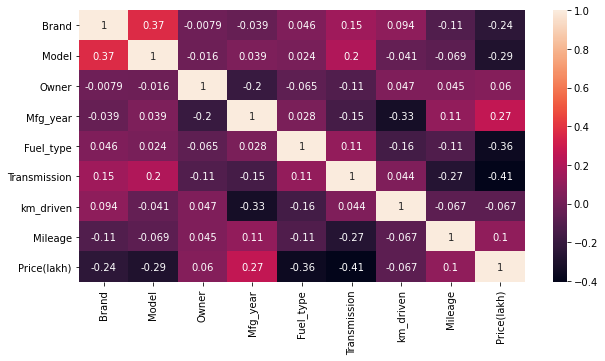

In [78]:
#first check Multicolinearity in our dataset
plt.figure(figsize=(10,5))
sb.heatmap(df_new.corr(),annot=True)
plt.show()

In [79]:
#2nd assumption of LinearRegression
#There should be a linear relationship between input and output
#to check linear relationship find residual
residual=y_test-y_pred
residual

328    12.384531
569     3.183993
191    -8.419261
197    -0.833758
494     4.868855
         ...    
117     3.551417
993     4.573693
79     -3.513068
995    -3.744061
858    -2.790339
Name: Price(lakh), Length: 261, dtype: float64

C:\Users\Shivraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


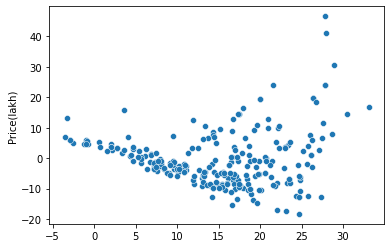

In [80]:
#visualize scatter plot between y_pred and residual
sb.scatterplot(y_pred,residual)
plt.show()

In [81]:
#Here data is linear 
#hence 2nd assumption fullfilled

In [82]:
# 3rd assumptionn: Data should be homoscedestic if it is linear

In [83]:
#Here we see homoscedestic pattern in our data 
#Hence 3rd assumption fulfilled

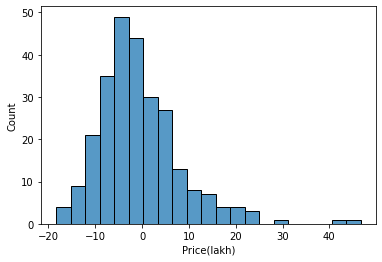

In [84]:
#To chech 4th Assumption: Residual should be normally distributed
sb.histplot(residual)
plt.show()

In [85]:
residual.skew()

1.5077221393068432

In [86]:
#Here we fond skewness in our data
#Inorder to remove skewness we have to apply Polyomial Regression

In [87]:
from sklearn.preprocessing import PolynomialFeatures

In [99]:
pf=PolynomialFeatures(2)# we increase degree of input data to 2

In [100]:
x_poly=pf.fit_transform(x)# input with degree 2

In [101]:
x_train,x_test,y_train,y_test =train_test_split(x_poly,y,test_size =0.3,random_state=1)

In [102]:
#train 70%data
lr.fit(x_train,y_train)

LinearRegression()

In [103]:
# test model with 30% data
y_pred=lr.predict(x_test)

In [104]:
dict={'actual o/p':y_test,'predicted o/p':y_pred}
df2=pd.DataFrame(dict)
df2

,actual o/p,predicted o/p
328,24.25,15.636393
569,5.95,13.207475
191,3.65,-0.580206
197,16.45,19.000388
494,19.50,25.491204
...,...,...
117,8.25,4.063761
993,3.60,1.242022
79,3.75,4.190058
995,6.48,5.971965


In [105]:
print(mean_squared_error(y_test,y_pred))

62.73944348329797


In [106]:
print(r2_score(y_test,y_pred))

0.5693531114787915


C:\Users\Shivraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


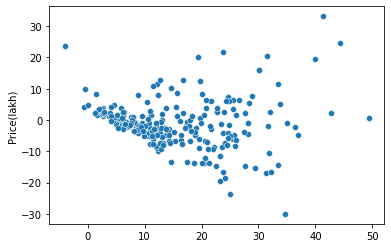

In [107]:
residual=y_test-y_pred
residual
sb.scatterplot(y_pred,residual)
plt.show()

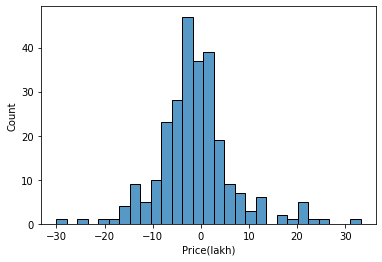

In [108]:
sb.histplot(residual)
plt.show()

In [109]:
residual.skew()

0.6204103661152334

In [ ]:
#We further raise degree we found increase in skewness and also drop in r2 score
#Hence our filnal defree for input data is 2 with skewness of o.62 and r2_score 56%

In [ ]:
# checking for overfitting 

In [110]:
print('training score',lr.score(x_train,y_train))

training score 0.5547780195511356


In [111]:
print('testing score',lr.score(x_test,y_test))

testing score 0.5693531114787915


In [ ]:
#Both training and testing score are similar hence there is no overfitting in our model

# conclusion:-
The data we got from web scraping is less accuriate and and contains many false values
We fond  multicolinearity between input variable but we cant remove them as they have strong corelation with otput variable
That is why our first assumtion(mlticolinarity) failed
we found linear relationship in data and data points are homoscedastic
Hence over final r2_score of model is 0.57